# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | socorro
Processing Record 3 of Set 1 | mugia
Processing Record 4 of Set 1 | mirto
Processing Record 5 of Set 1 | dikhil
Processing Record 6 of Set 1 | minas de marcona
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | oberstaufen
Processing Record 10 of Set 1 | saint-pierre
Processing Record 11 of Set 1 | hammerfest
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | klaksvik
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | gawler
Processing Record 19 of Set 1 | petoskey
Processing Record 20 of Set 1 | ippy
Processing Record 21 of Set 1 | bikenibeu village
Processing Record 22 of Set 1 | puerto ayora
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,14.50,79,95,5.84,SH,1702161478
1,socorro,31.6546,-106.3033,11.92,12,0,9.26,US,1702161478
2,mugia,43.1041,-9.2179,16.62,97,100,6.84,ES,1702161478
3,mirto,38.0847,14.7515,9.61,83,31,0.87,IT,1702161478
4,dikhil,11.5000,42.1667,20.63,69,0,5.95,DJ,1702161478


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,14.50,79,95,5.84,SH,1702161478
1,socorro,31.6546,-106.3033,11.92,12,0,9.26,US,1702161478
2,mugia,43.1041,-9.2179,16.62,97,100,6.84,ES,1702161478
3,mirto,38.0847,14.7515,9.61,83,31,0.87,IT,1702161478
4,dikhil,11.5000,42.1667,20.63,69,0,5.95,DJ,1702161478


In [17]:
#Convert date into a more readable format
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,14.50,79,95,5.84,SH,2023-12-09
1,socorro,31.6546,-106.3033,11.92,12,0,9.26,US,2023-12-09
2,mugia,43.1041,-9.2179,16.62,97,100,6.84,ES,2023-12-09
3,mirto,38.0847,14.7515,9.61,83,31,0.87,IT,2023-12-09
4,dikhil,11.5000,42.1667,20.63,69,0,5.95,DJ,2023-12-09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

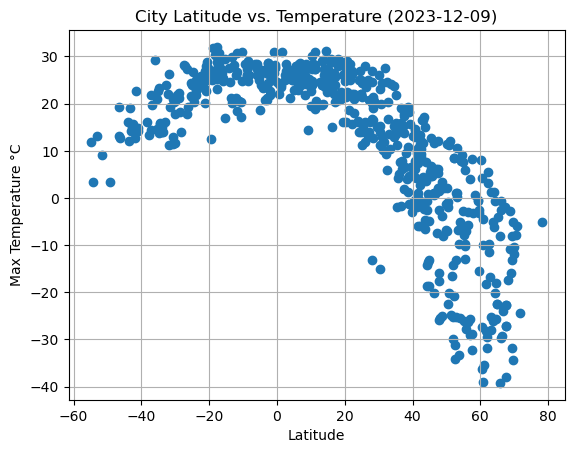

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")

# Save the figure
plt.savefig("lat_vs_temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

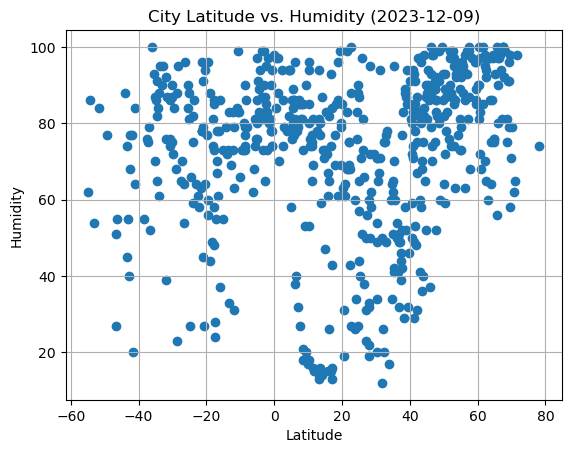

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])


# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Humidity ({date})")

# Save the figure
plt.savefig("lat_vs_humid.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

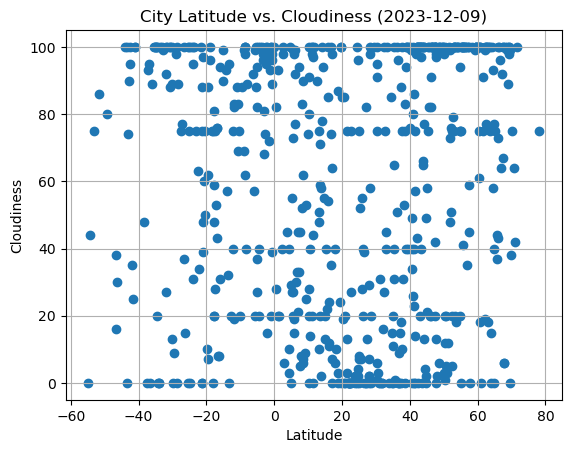

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])
# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Cloudiness ({date})")
# Save the figure
plt.savefig("lat_vs_cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

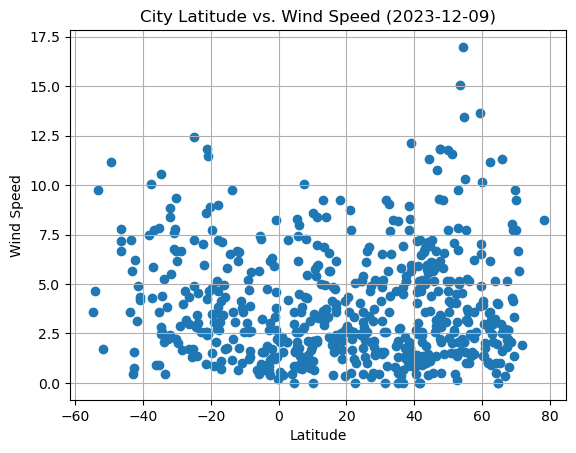

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Wind Speed ({date})")

# Save the figure
plt.savefig("lat_vs_wind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
def lr_function(x, y, name, vbl, hemi):
    (slope,intercept, rvalue,pvalue,stderror)=linregress(x,y)
    reg_values=x*slope + intercept
    plt.plot(x,reg_values)
    plt.title(f'Latitude vs {vbl} - {hemi}')
    

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hem_df= city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
north_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,socorro,31.6546,-106.3033,11.92,12,0,9.26,US,2023-12-09
2,mugia,43.1041,-9.2179,16.62,97,100,6.84,ES,2023-12-09
3,mirto,38.0847,14.7515,9.61,83,31,0.87,IT,2023-12-09
4,dikhil,11.5000,42.1667,20.63,69,0,5.95,DJ,2023-12-09
6,wailua homesteads,22.0669,-159.3780,26.24,75,0,2.57,US,2023-12-09


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[city_data_df['Lat'] <= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,14.50,79,95,5.84,SH,2023-12-09
5,minas de marcona,-15.2119,-75.1103,16.91,73,99,5.79,PE,2023-12-09
7,hermanus,-34.4187,19.2345,15.81,84,0,4.38,ZA,2023-12-09
9,saint-pierre,-21.3393,55.4781,24.82,78,0,2.57,RE,2023-12-09
11,waitangi,-43.9535,-176.5597,16.01,88,100,3.58,NZ,2023-12-09


###  Temperature vs. Latitude Linear Regression Plot

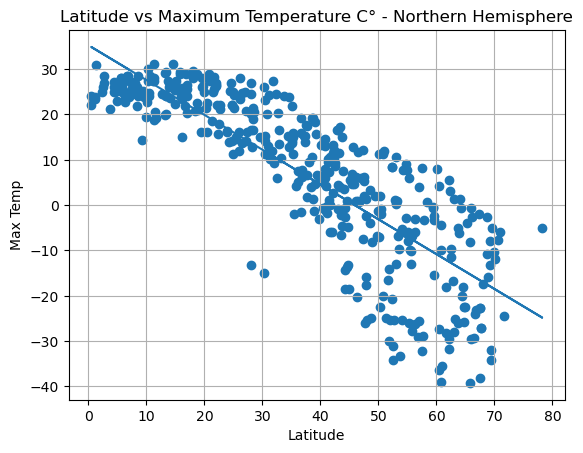

In [60]:
# Linear regression on Northern Hemisphere
plt.scatter(north_hem_df['Lat'],north_hem_df['Max Temp'])

#Graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Northern Hemisphere")

#Run Function
lr_function(x,y,name,vbl,hemi)
plt.plot(colors= 'b')

#Define function arguments
x = north_hem_df['Lat']
y = north_hem_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Northern Hemisphere'
plt.show()

#Print Outcomes


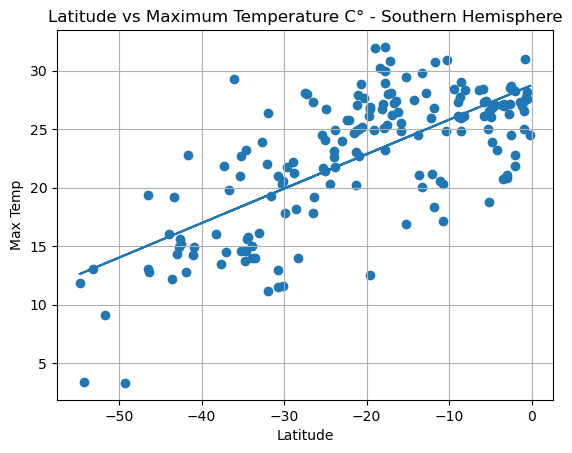

In [72]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])

#Graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Southern Hemisphere")

#Run Function
lr_function(x,y,name,vbl,hemi)
plt.plot(colors= 'r')

#Define function arguments
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Southern Hemisphere'
plt.show()

**Discussion about the linear relationship:** Both of these models show that the farther that a city is from the Equator, the lower the average temperature is likely to be. 

### Humidity vs. Latitude Linear Regression Plot

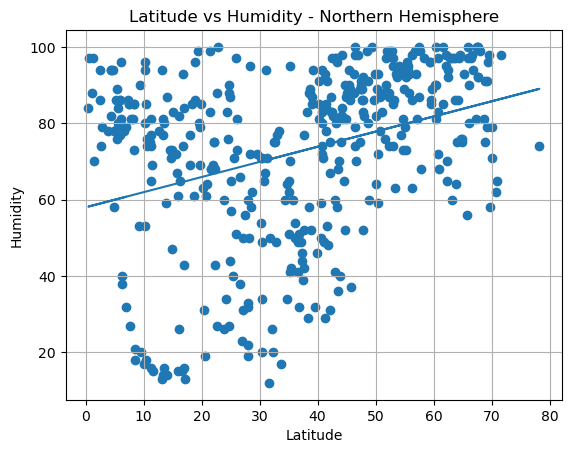

In [70]:
# Northern Hemisphere
plt.scatter(north_hem_df['Lat'],north_hem_df['Humidity'])

#Graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity in Northern Hemisphere")

#Run Function
lr_function(x,y,name,vbl,hemi)
plt.plot(colors= 'b')

#Define function arguments
x = north_hem_df['Lat']
y = north_hem_df['Humidity']
name = 'NH_LatVsMaxHumidity'
vbl = 'Humidity'
hemi = 'Northern Hemisphere'
plt.show()

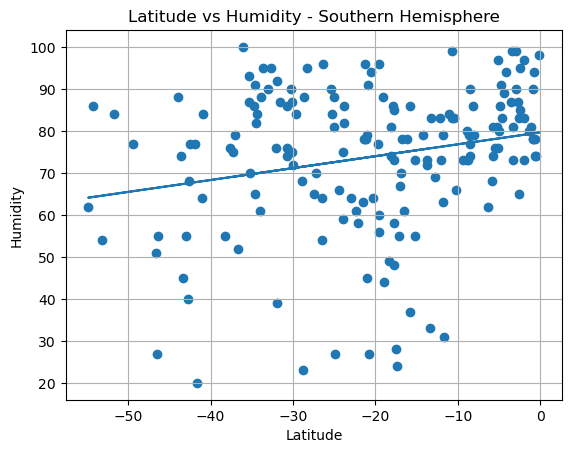

In [74]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])

#Graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity in Southern Hemisphere")

#Run Function
lr_function(x,y,name,vbl,hemi)
plt.plot(colors= 'b')

#Define function arguments
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_LatVsHumidity'
vbl = 'Humidity'
hemi = 'Southern Hemisphere'
plt.show()

**Discussion about the linear relationship:** The models show that in the Southern Hemisphere there is likely to be more humidity the closer to the Equator one gets. However, the Northern Hemisphere shows that humidity is much more spread out, witch little to no relationship to its proximity to the Equator. 

### Cloudiness vs. Latitude Linear Regression Plot

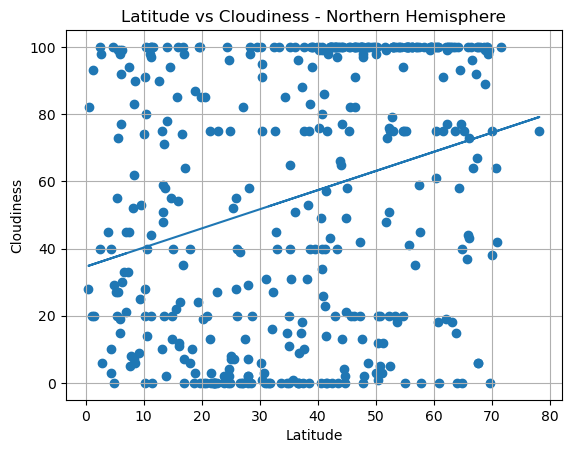

In [78]:
# Northern Hemisphere
plt.scatter(north_hem_df['Lat'],north_hem_df['Cloudiness'])

#Graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness in Northern Hemisphere")

#Run Function
lr_function(x,y,name,vbl,hemi)
plt.plot(colors= 'b')

#Define function arguments
x = north_hem_df['Lat']
y = north_hem_df['Cloudiness']
name = 'NH_LatVsClouds'
vbl = 'Cloudiness'
hemi = 'Northern Hemisphere'
plt.show()

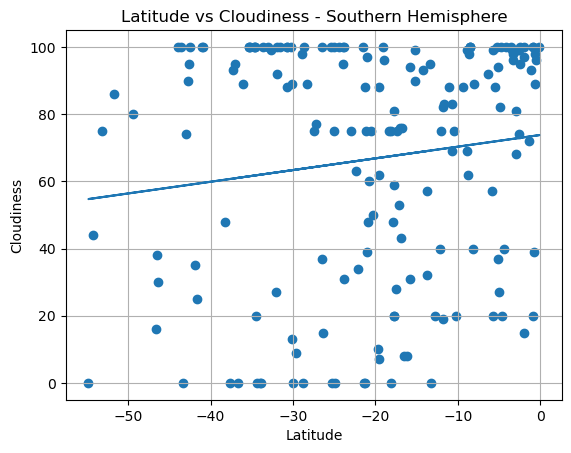

In [80]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])

#Graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness in Southern Hemisphere")

#Run Function
lr_function(x,y,name,vbl,hemi)
plt.plot(colors= 'b')

#Define function arguments
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_LatVsClouds'
vbl = 'Cloudiness'
hemi = 'Southern Hemisphere'
plt.show()

**Discussion about the linear relationship:** While cloud cover is generally varied throughout both hemispheres, there is a slight relationship showing that more clouds can be expected the farther one travels north. 

### Wind Speed vs. Latitude Linear Regression Plot

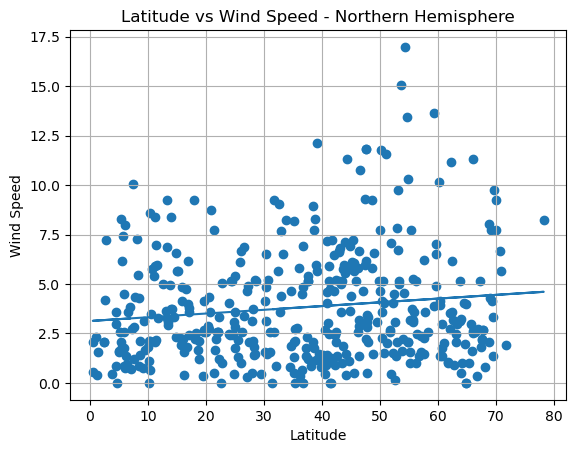

In [82]:
# Northern Hemisphere
plt.scatter(north_hem_df['Lat'],north_hem_df['Wind Speed'])

#Graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed in Northern Hemisphere")

#Run Function
lr_function(x,y,name,vbl,hemi)
plt.plot(colors= 'b')

#Define function arguments
x = north_hem_df['Lat']
y = north_hem_df['Wind Speed']
name = 'NH_LatVsWind'
vbl = 'Wind Speed'
hemi = 'Northern Hemisphere'
plt.show()

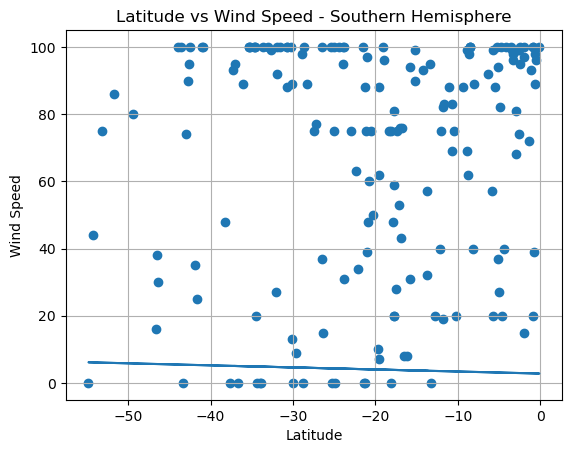

In [84]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])

#Graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed in Southern Hemisphere")

#Run Function
lr_function(x,y,name,vbl,hemi)
plt.plot(colors= 'b')

#Define function arguments
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWind'
vbl = 'Wind Speed'
hemi = 'Southern Hemisphere'
plt.show()

**Discussion about the linear relationship:** The plots here indicate that although latitutde does not seem to affect wind speed in a big way, there tend to be lower winds speds the closer to the Equator one gets. 